# INPUT DATASET : input에서 val안의 different폴더를 제외하고 진행

In [1]:
import tensorflow as tf

In [2]:
import os
print(os.listdir(".../input"))
print(os.listdir(".../input/keras-pretrained-models"))
data_dir = '.../input/22-dataset'
vgg16weight = '.../vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50weight = '.../resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

['.ipynb_checkpoints', '10-celebrity-faces-dataset', '22-dataset', 'expression_dataset3', 'keras-pretrained-models']
['imagenet_class_index.json', 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5', 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5', 'inception_v3_weights_tf_dim_ordering_tf_kernels.h5', 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 'Kuszma.JPG', 'resnet50_weights_tf_dim_ordering_tf_kernels.h5', 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 'xception_weights_tf_dim_ordering_tf_kernels.h5', 'xception_weights_tf_dim_ordering_tf_kernels_notop.h5']


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Convolution2D, Dropout
from keras.layers import AveragePooling2D
from keras.layers import Activation, Flatten, Dense
from keras.layers import SeparableConv2D
from keras.optimizers import RMSprop, SGD
from keras import backend as K
import keras
import matplotlib.pyplot as plt
import cv2

import numpy as np
import pandas as pd
#%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import sys

from keras.preprocessing import image
from keras.models import load_model
from keras.layers import Input
from keras import layers

In [4]:
img_width, img_height = 200, 200
train_data_dir = os.path.join(data_dir, 'train')
validation_data_dir = os.path.join(data_dir, 'val')
nb_train_samples = 1011 #train
nb_validation_samples = 223 # val 
epochs = 50
batch_size = 32
numclasses = 22 #classes 

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,  
    zoom_range = 0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    vertical_flip=False,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1011 images belonging to 22 classes.
Found 223 images belonging to 22 classes.


In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
def vgg16CNNtl(input_shape, outclass, sigma='sigmoid'):    
    base_model = None
    base_model = keras.applications.VGG16(weights=None, include_top=False, input_shape=input_shape)
    base_model.load_weights(vgg16weight)
    top_model = Sequential()
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    for i in range(2):
        top_model.add(Dense(4096, activation='relu'))
        top_model.add(Dropout(0.5))
    top_model.add(Dense(outclass, activation=sigma))
    model = None
    model = Model(inputs=base_model.input, outputs=top_model(base_model.output))    
    return model


In [8]:
model_r = vgg16CNNtl(input_shape, numclasses, 'softmax')
lr = 1e-5
decay = 1e-7
optimizer = RMSprop(lr=lr, decay=decay)
model_r.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [9]:
history = model_r.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
31/31 [==============================] - 13s 411ms/step - loss: 3.3133 - accuracy: 0.0541 - val_loss: 2.9109 - val_accuracy: 0.1927
Epoch 2/50
31/31 [==============================] - 11s 347ms/step - loss: 3.0817 - accuracy: 0.0981 - val_loss: 2.6433 - val_accuracy: 0.2292
Epoch 3/50
31/31 [==============================] - 11s 347ms/step - loss: 2.8423 - accuracy: 0.1532 - val_loss: 2.2571 - val_accuracy: 0.4062
Epoch 4/50
31/31 [==============================] - 11s 346ms/step - loss: 2.5665 - accuracy: 0.2278 - val_loss: 1.9676 - val_accuracy: 0.5000
Epoch 5/50
31/31 [==============================] - 11s 347ms/step - loss: 2.3036 - accuracy: 0.3064 - val_loss: 1.7206 - val_accuracy: 0.4948
Epoch 6/50
31/31 [==============================] - 11s 347ms/step - loss: 2.1414 - accuracy: 0.3412 - val_loss: 1.6004 - val_accuracy: 0.5260
Epoch 7/50
31/31 [==============================] - 11s 347ms/step

In [10]:
saveweight =  'celebriytag_weight.h5'
model_r.save_weights(saveweight)

In [11]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [12]:
df = pd.read_csv("fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [13]:
image_size=(48,48)

pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')] 
    face = np.asarray(face).reshape(width, height) 
    face = cv2.resize(face.astype('uint8'),image_size) 
    faces.append(face.astype('float32')) 

    
faces = np.asarray(faces) 
faces = np.expand_dims(faces, -1) 

In [14]:
from keras.utils import np_utils

emotion = df['emotion'].tolist()
emotions =[]

emotions = np.asarray(emotion)
emotions = np.expand_dims(emotions,-1)
emotions = np_utils.to_categorical(emotions)

In [15]:
x = faces.astype('float32')
x = x / 255.0 

x = x - 0.5
x = x * 2.0

num_samples = x.shape[0]
print(num_samples) 

35887


In [16]:
num_samples, num_classes = emotions.shape
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

print('Training Pixels',train_x.shape)
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


In [17]:
input_shape=(48, 48, 1)
num_classes = 7

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())

model.add(Activation('softmax',name='predictions'))

In [18]:
batch_size = 32
num_epochs = 100
verbose = 1
num_classes = 7 

data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [19]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

train_faces, train_emotions = train_data
history=model.fit_generator(data_generator.flow(train_faces, train_emotions,batch_size),
                            epochs=num_epochs,
                            verbose=1,
                            validation_data=val_data)

Epoch 1/100
898/898 [==============================] - 11s 12ms/step - loss: 1.7625 - accuracy: 0.2975 - val_loss: 1.6567 - val_accuracy: 0.3856
Epoch 2/100
898/898 [==============================] - 10s 11ms/step - loss: 1.6439 - accuracy: 0.3530 - val_loss: 1.5066 - val_accuracy: 0.4217
Epoch 3/100
898/898 [==============================] - 10s 11ms/step - loss: 1.5838 - accuracy: 0.3768 - val_loss: 1.4892 - val_accuracy: 0.4191
Epoch 4/100
898/898 [==============================] - 10s 11ms/step - loss: 1.5446 - accuracy: 0.3923 - val_loss: 1.4398 - val_accuracy: 0.4455
Epoch 5/100
898/898 [==============================] - 10s 11ms/step - loss: 1.5078 - accuracy: 0.4137 - val_loss: 1.3638 - val_accuracy: 0.4685
Epoch 6/100
898/898 [==============================] - 10s 11ms/step - loss: 1.4652 - accuracy: 0.4324 - val_loss: 1.3468 - val_accuracy: 0.4904
Epoch 7/100
898/898 [==============================] - 10s 11ms/step - loss: 1.4372 - accuracy: 0.4472 - val_loss: 1.3109 - val_ac

In [20]:
model.save("emotion_temp.h5")
score = model.evaluate(val_x, val_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

225/225 [==============================] - 1s 4ms/step - loss: 1.0581 - accuracy: 0.5960
Test loss: 1.0580641031265259
Test accuracy: 59.59877371788025


In [21]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    #plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

[0 1 2 3 4 5 6]


# INPUT DATASET : input에서 val안의 different폴더를 포함하고 진행

In [22]:
from skimage import io
img = image.load_img('.../input/22-dataset/val/JangDoYeon/JangDoYeon25.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/JangDoYeon/JangDoYeon25.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

C:\Users\USERL\anaconda3\envs\py3.6\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Expression Prediction: neutral


In [23]:
import requests
client_id = "" # id of your api
client_secret = "" #password of your api
url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/JangDoYeon/JangDoYeon25.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)

{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":46,"y":66,"width":167,"height":167},"landmark":{"leftEye":{"x":83,"y":99},"rightEye":{"x":175,"y":99},"nose":{"x":123,"y":159},"leftMouth":{"x":87,"y":202},"rightMouth":{"x":159,"y":209}},"gender":{"value":"female","confidence":0.99988},"age":{"value":"18~22","confidence":1.0},"emotion":{"value":"neutral","confidence":0.982526},"pose":{"value":"frontal_face","confidence":0.999717}}]}


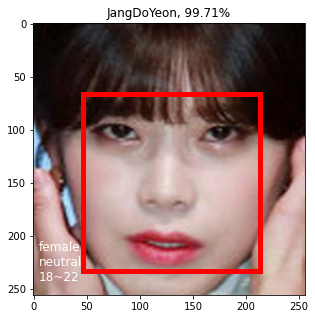

In [24]:
import matplotlib.image as mpimg
import matplotlib.patches as patches
import json
from PIL import Image

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['JangDoYeon/JangDoYeon25.jpg']
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: neutral
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":45,"y":58,"width":167,"height":167},"landmark":{"leftEye":{"x":81,"y":96},"rightEye":{"x":175,"y":100},"nose":{"x":126,"y":138},"leftMouth":{"x":90,"y":194},"rightMouth":{"x":163,"y":195}},"gender":{"value":"female","confidence":0.999432},"age":{"value":"19~23","confidence":1.0},"emotion":{"value":"neutral","confidence":0.999873},"pose":{"value":"frontal_face","confidence":0.999973}}]}


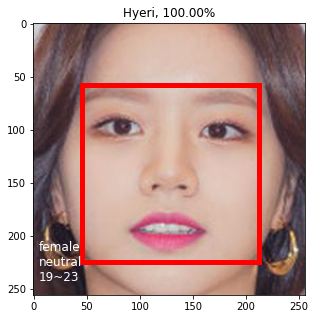

In [25]:
img = image.load_img('.../input/22-dataset/val/Hyeri/Hyeri238.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/Hyeri/Hyeri238.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/Hyeri/Hyeri238.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['Hyeri/Hyeri238.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: happy
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":57,"y":66,"width":158,"height":158},"landmark":{"leftEye":{"x":85,"y":104},"rightEye":{"x":175,"y":100},"nose":{"x":134,"y":159},"leftMouth":{"x":86,"y":193},"rightMouth":{"x":181,"y":187}},"gender":{"value":"male","confidence":0.99381},"age":{"value":"23~27","confidence":0.612554},"emotion":{"value":"laugh","confidence":0.730753},"pose":{"value":"frontal_face","confidence":0.999636}}]}


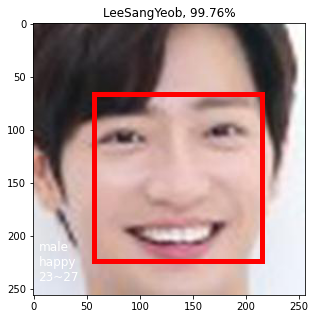

In [26]:
img = image.load_img('.../input/22-dataset/val/LeeSangYeob/LeeSangYeob37.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/LeeSangYeob/LeeSangYeob37.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/LeeSangYeob/LeeSangYeob37.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)
    
fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['LeeSangYeob/LeeSangYeob37.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: neutral
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":57,"y":66,"width":158,"height":158},"landmark":{"leftEye":{"x":85,"y":104},"rightEye":{"x":175,"y":100},"nose":{"x":134,"y":159},"leftMouth":{"x":86,"y":193},"rightMouth":{"x":181,"y":187}},"gender":{"value":"male","confidence":0.99381},"age":{"value":"23~27","confidence":0.612554},"emotion":{"value":"laugh","confidence":0.730753},"pose":{"value":"frontal_face","confidence":0.999636}}]}


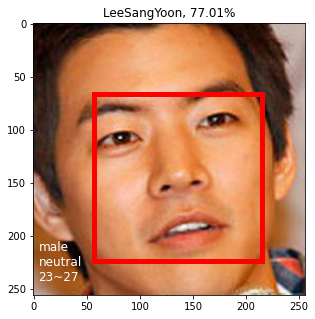

In [27]:
img = image.load_img('.../input/22-dataset/val/LeeSangYoon/LeeSangYoon275.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/LeeSangYoon/LeeSangYoon275.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/LeeSangYeob/LeeSangYeob37.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)
    
import matplotlib.image as mpimg
import matplotlib.patches as patches
import json
from PIL import Image

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['LeeSangYoon/LeeSangYoon275.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: happy
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":58,"y":69,"width":154,"height":154},"landmark":{"leftEye":{"x":84,"y":108},"rightEye":{"x":177,"y":95},"nose":{"x":149,"y":167},"leftMouth":{"x":99,"y":201},"rightMouth":{"x":177,"y":188}},"gender":{"value":"female","confidence":0.999983},"age":{"value":"21~25","confidence":0.788365},"emotion":{"value":"neutral","confidence":0.549628},"pose":{"value":"frontal_face","confidence":0.999796}}]}


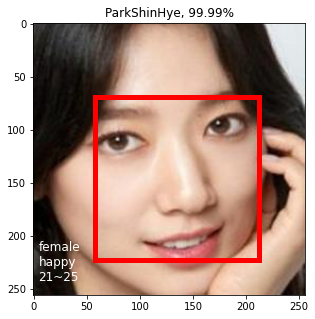

In [28]:
img = image.load_img('.../input/22-dataset/val/ParkShinHye/ParkShinHye17.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/ParkShinHye/ParkShinHye17.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/ParkShinHye/ParkShinHye17.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)
    
import matplotlib.image as mpimg
import matplotlib.patches as patches
import json
from PIL import Image

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['ParkShinHye/ParkShinHye17.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: neutral
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":45,"y":59,"width":167,"height":167},"landmark":{"leftEye":{"x":82,"y":96},"rightEye":{"x":174,"y":102},"nose":{"x":123,"y":138},"leftMouth":{"x":84,"y":192},"rightMouth":{"x":155,"y":198}},"gender":{"value":"male","confidence":0.996336},"age":{"value":"19~23","confidence":1.0},"emotion":{"value":"neutral","confidence":0.999998},"pose":{"value":"frontal_face","confidence":0.999913}}]}


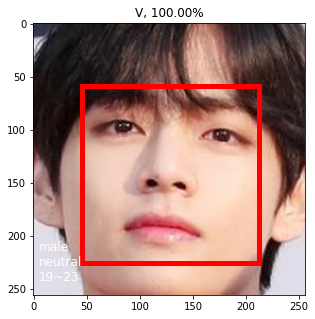

In [29]:
img = image.load_img('.../input/22-dataset/val/V/V23.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/V/V23.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/V/V23.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['V/V23.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: sad
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":38,"y":67,"width":175,"height":175},"landmark":{"leftEye":{"x":76,"y":100},"rightEye":{"x":160,"y":98},"nose":{"x":105,"y":152},"leftMouth":{"x":89,"y":207},"rightMouth":{"x":149,"y":206}},"gender":{"value":"female","confidence":0.98367},"age":{"value":"25~29","confidence":0.498618},"emotion":{"value":"sad","confidence":1.0},"pose":{"value":"frontal_face","confidence":0.991979}}]}


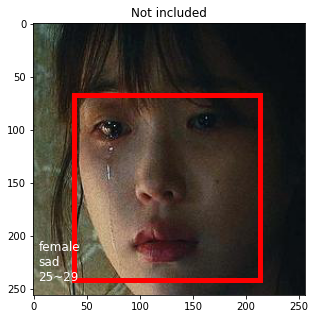

In [31]:
img = image.load_img('.../input/22-dataset/val/different/iu.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/different/iu.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)


m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/different/iu.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)


fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['different/iu.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: neutral
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":43,"y":62,"width":174,"height":174},"landmark":{"leftEye":{"x":79,"y":100},"rightEye":{"x":177,"y":100},"nose":{"x":126,"y":161},"leftMouth":{"x":93,"y":205},"rightMouth":{"x":166,"y":202}},"gender":{"value":"male","confidence":0.678117},"age":{"value":"30~34","confidence":0.156215},"emotion":{"value":"neutral","confidence":0.999819},"pose":{"value":"frontal_face","confidence":0.999844}}]}


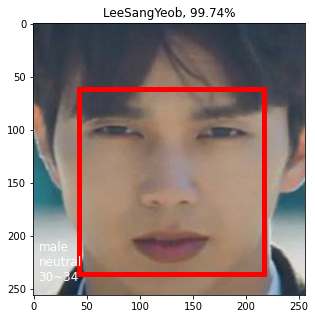

In [32]:
img = image.load_img('.../input/22-dataset/val/different/YooSeungho2.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/different/YooSeungho2.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/different/YooSeungho2.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)
    
import matplotlib.image as mpimg
import matplotlib.patches as patches
import json
from PIL import Image

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['different/YooSeungho2.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: neutral
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":42,"y":58,"width":184,"height":184},"landmark":{"leftEye":{"x":80,"y":100},"rightEye":{"x":176,"y":98},"nose":{"x":126,"y":151},"leftMouth":{"x":82,"y":198},"rightMouth":{"x":171,"y":193}},"gender":{"value":"male","confidence":0.999869},"age":{"value":"30~34","confidence":0.936313},"emotion":{"value":"neutral","confidence":0.999999},"pose":{"value":"frontal_face","confidence":0.999805}}]}


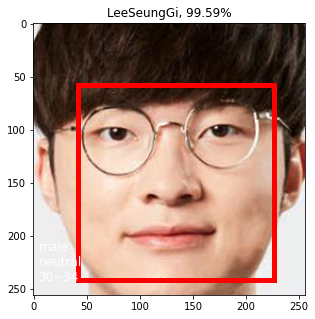

In [33]:
img = image.load_img('.../input/22-dataset/val/different/Faker.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/different/Faker.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/different/Faker.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)


fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['different/Faker.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: neutral
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":49,"y":57,"width":163,"height":163},"landmark":{"leftEye":{"x":86,"y":99},"rightEye":{"x":167,"y":99},"nose":{"x":130,"y":152},"leftMouth":{"x":92,"y":196},"rightMouth":{"x":164,"y":196}},"gender":{"value":"male","confidence":0.999831},"age":{"value":"22~26","confidence":0.554354},"emotion":{"value":"neutral","confidence":0.999962},"pose":{"value":"frontal_face","confidence":0.998988}}]}


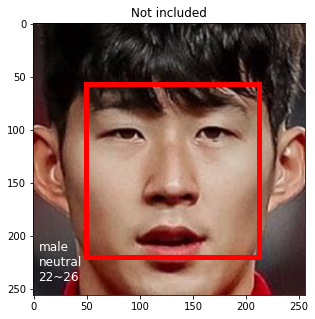

In [35]:
img = image.load_img('.../input/22-dataset/val/different/Son.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/different/Son.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/different/Son.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)
    
import matplotlib.image as mpimg
import matplotlib.patches as patches
import json
from PIL import Image

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['different/Son.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()

Expression Prediction: neutral
{"info":{"size":{"width":256,"height":256},"faceCount":1},"faces":[{"roi":{"x":51,"y":67,"width":160,"height":160},"landmark":{"leftEye":{"x":79,"y":102},"rightEye":{"x":175,"y":104},"nose":{"x":130,"y":158},"leftMouth":{"x":91,"y":203},"rightMouth":{"x":164,"y":201}},"gender":{"value":"male","confidence":0.983381},"age":{"value":"32~36","confidence":0.448979},"emotion":{"value":"neutral","confidence":0.999994},"pose":{"value":"frontal_face","confidence":0.999971}}]}


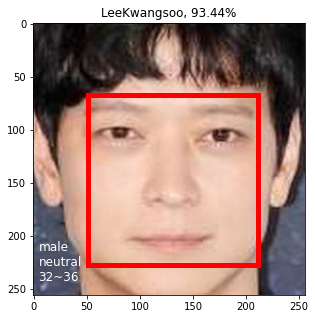

In [36]:
img = image.load_img('.../input/22-dataset/val/different/Kangdongwon.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('.../input/22-dataset/val/different/Kangdongwon.jpg', grayscale=True, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

url = "https://openapi.naver.com/v1/vision/face"
files ={'image': open('.../input/22-dataset/val/different/Kangdongwon.jpg','rb')}
headers ={'X-Naver-Client-Id': client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files = files, headers=headers)
rescode = response.status_code
if(rescode ==200):
    print(response.text)
else:
    print("Error Code:"+ rescode)

fig,ax1 = plt.subplots(figsize =(5,5))

detect_result = json.loads(response.text)
detect_result

detect_summary = detect_result['faces'][0]
x1,y1,w,h = detect_summary['roi'].values()
gender,gen_confidence = detect_summary['gender'].values()
#emotion, emotion_confidence = detect_summary['emotion'].values()
emotion = objects[ind]
age, age_confidence  = detect_summary['age'].values()

labels =['HaHa','HwangKwangHee','Hyeri','JEONGJUNHA','JUNJIN','JangDoYeon','JeeSeokJin','JeonSoMin','JeongHyeongDon','kangHoDong','LeeKwangsoo','LeeSangYeob','LeeSangYoon','LeeSeungGi','Leesoogeun','ParkMyungSoo','ParkShinHye','SongJiHyo','V','YooJaeSuk','kimjongguk','rohhongchul']
test_imgs = ['different/Kangdongwon.jpg'] ##전진의 경우 png가 많아 png로 확장자명을 바꿔서 사용
for test in test_imgs:
    test_img = os.path.join(validation_data_dir, test)
    img = image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model_r.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.axis('off')
    if result[result_indices]>=0.75:
        ax1.set_title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    else:
        ax1.set_title("Not included")

ax1.imshow(img)

rect_face = patches.Rectangle((x1,y1),w,h, linewidth =5, edgecolor ='r',facecolor = 'none')

ax1.add_patch(rect_face)

#annotation = gender +':'+ str(gen_confidence)+ '\n'+emotion +':'+str(emotion_confidence)+ '\n'+age +':'+ str(age_confidence)
annotation = gender + '\n'+emotion + '\n'+age 
plt.figtext(0.15,0.17,annotation, wrap=True, fontsize =12, color ='white')
plt.show()